# Pair Programming Intro Regresión Lineal

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que

- Deberéis separar la X y la y.

- Deberéis crear el train y el test.

- Ajustar vuestro modelo.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# 1º INTENTO: Regresión lineal con Label

In [3]:
df_label = pd.read_pickle('../archivos/country_label.pkl')
df_label.sample()

,country,basic_boxcox,basic,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,...,taxi,gasoline,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary,country_label
747,South Africa,15.092293,145.62,-0.834758,-0.416667,0.041667,-0.248555,-0.471014,-0.412727,-0.549809,...,-0.567708,-0.098361,0.304185,-0.330903,-0.401021,-0.255439,-0.481696,-0.093507,-0.144383,174


In [8]:
X = df_label.drop(["basic_boxcox", "basic", "country"], axis = 1)
y = df_label["basic_boxcox"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
lr = LinearRegression(n_jobs=-1)

In [11]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [12]:
y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test)

In [13]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train), 'Type': ['Label 1']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test), 'Type': ['Label 1']*len(y_test)})
resultados_label = pd.concat([train_df,test_df], axis = 0)
resultados_label.head()

,Real,Predicted,Set,Type
727,7.212959,8.011779,Train,Label 1
3032,14.435589,14.474359,Train,Label 1
976,14.522231,16.248121,Train,Label 1
3688,12.504671,13.447959,Train,Label 1
3831,13.401324,14.083688,Train,Label 1


In [14]:
resultados_label['residuos'] = resultados_label['Real'] - resultados_label['Predicted']
resultados_label.head()

,Real,Predicted,Set,Type,residuos
727,7.212959,8.011779,Train,Label 1,-0.798820
3032,14.435589,14.474359,Train,Label 1,-0.038770
976,14.522231,16.248121,Train,Label 1,-1.725891
3688,12.504671,13.447959,Train,Label 1,-0.943288
3831,13.401324,14.083688,Train,Label 1,-0.682364


In [15]:
cv_scores_label = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

cv_scores_label = pd.DataFrame(cv_scores_label)
cv_scores_label

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.006955,0.001536,0.426966,-2.977207
1,0.003423,0.001629,-533.147784,-108.487914
2,0.003169,0.001555,0.605990,-2.558337
3,0.004299,0.001599,0.630811,-2.617950
4,0.003517,0.001403,0.601901,-2.533966
5,0.003301,0.001523,0.429548,-2.793030
6,0.003389,0.001463,0.295483,-3.300831
7,0.004755,0.001738,0.314666,-3.057603
8,0.003376,0.001512,0.250856,-3.040699
9,0.003414,0.001183,0.269409,-3.179174


In [16]:
print(f'la media para el r2 es {cv_scores_label["test_r2"].mean()}')
print(f'la media para el RMSE es {abs(cv_scores_label["test_neg_root_mean_squared_error"].mean())}')

la media para el r2 es -52.93221556189714
la media para el RMSE es 13.454671132420279


In [18]:
resultados_metricas_label = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "Linear Regression"],
                 "type": ['Label 1', 'Label 1']}

df_resultados_label = pd.DataFrame(resultados_metricas_label)

df_resultados_label

,MAE,MSE,RMSE,R2,set,modelo,type
0,2.207270,7.893886,2.809606,0.540264,test,Linear Regresion,Label 1
1,2.284685,8.472299,2.910721,0.527266,train,Linear Regression,Label 1


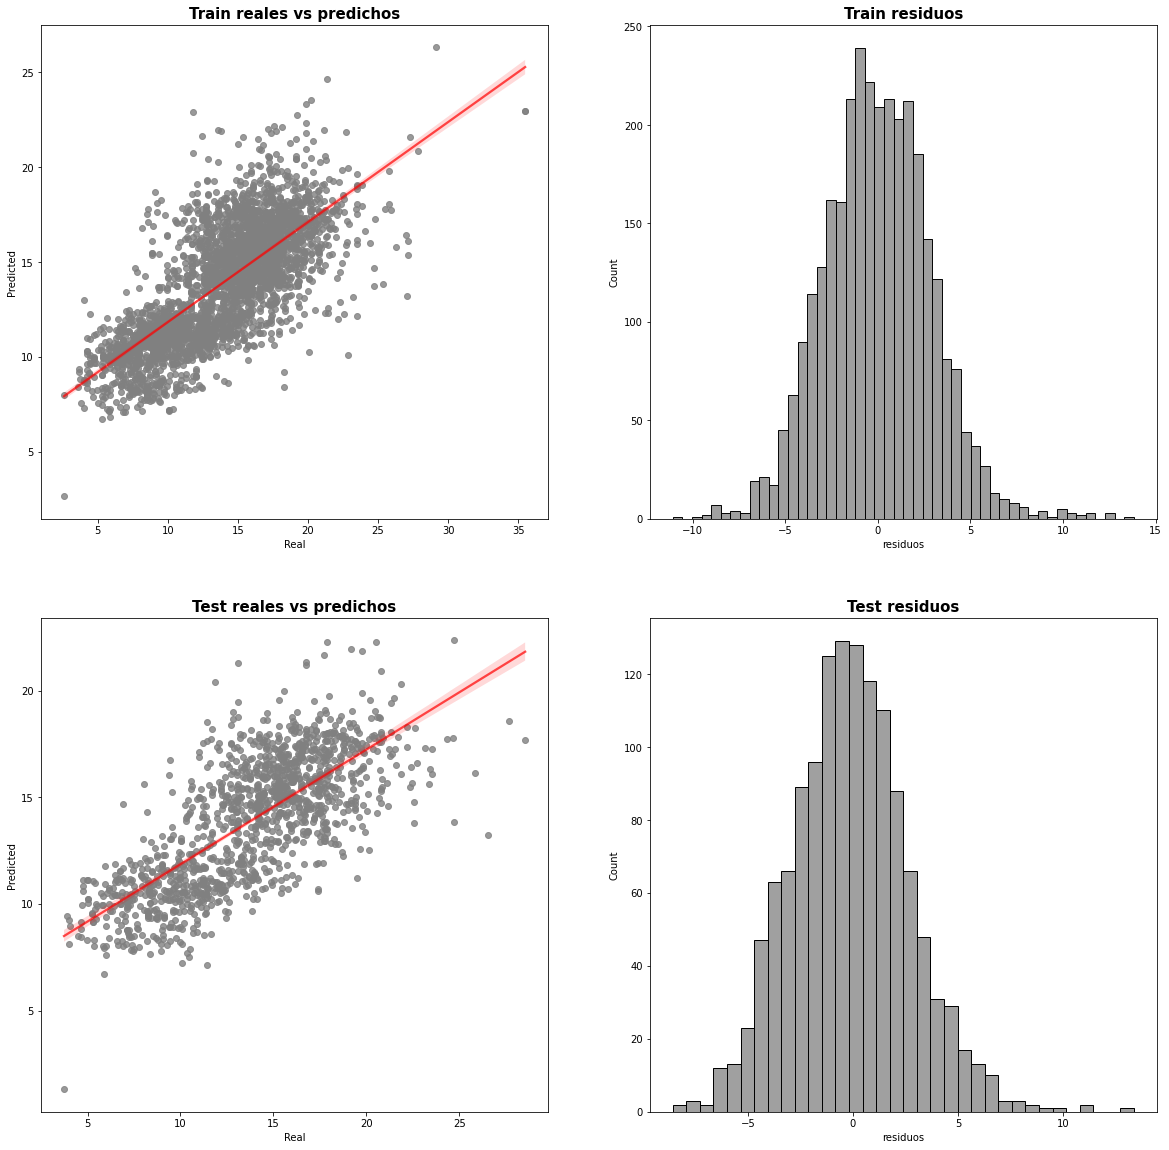

In [19]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

sns.regplot(data = resultados_label[resultados_label['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados_label[resultados_label['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


sns.histplot(resultados_label[resultados_label['Set'] == "Train"],
             x="residuos",
             color ="grey",
            #  kde=True, 
             ax = ax[0,1])


sns.histplot(resultados_label[resultados_label['Set'] == "Test"],
             x="residuos",
             color = "grey",
            #  kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

# 2º INTENTO: Regresión lineal con Dummies

In [20]:
df_dummie = pd.read_pickle('../archivos/country_dummie.pkl')
df_dummie.sample()

,basic_boxcox,basic,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
2905,8.758376,46.08,-0.413105,-0.282407,0.208333,-0.289017,-0.407875,-0.692727,1.216244,-0.811388,...,0,0,0,0,0,0,0,0,0,0


In [21]:
Xd = df_dummie.drop(["basic_boxcox", "basic"], axis = 1)
yd = df_dummie["basic_boxcox"]

In [22]:
xd_train, xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.3, random_state = 42)

In [23]:
lr.fit(xd_train, yd_train)

LinearRegression(n_jobs=-1)

In [24]:
yd_predict_train = lr.predict(xd_train)
yd_predict_test = lr.predict(xd_test)

In [25]:
traind_df = pd.DataFrame({'Real': yd_train, 'Predicted': yd_predict_train, 'Set': ['Train']*len(yd_train), 'Type': ['Dummie 1']*len(yd_train)})
testd_df  = pd.DataFrame({'Real': yd_test,  'Predicted': yd_predict_test,  'Set': ['Test']*len(yd_test), 'Type': ['Dummie 1']*len(yd_test)})
resultados_dummie = pd.concat([traind_df,testd_df], axis = 0)
resultados_dummie.head()

,Real,Predicted,Set,Type
727,7.212959,5.148165,Train,Dummie 1
3032,14.435589,15.670055,Train,Dummie 1
976,14.522231,16.416692,Train,Dummie 1
3688,12.504671,13.595553,Train,Dummie 1
3831,13.401324,13.970667,Train,Dummie 1


In [26]:
resultados_dummie['residuos'] = resultados_dummie['Real'] - resultados_dummie['Predicted']
resultados_dummie.head()

,Real,Predicted,Set,Type,residuos
727,7.212959,5.148165,Train,Dummie 1,2.064794
3032,14.435589,15.670055,Train,Dummie 1,-1.234467
976,14.522231,16.416692,Train,Dummie 1,-1.894462
3688,12.504671,13.595553,Train,Dummie 1,-1.090882
3831,13.401324,13.970667,Train,Dummie 1,-0.569343


In [27]:
cv_scores_dummie = cross_validate(
                estimator = LinearRegression(),
                X         = Xd,
                y         = yd,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores_dummie = pd.DataFrame(cv_scores_dummie)
cv_scores_dummie

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.044532,0.002741,7.095267e-01,-2.119688e+00
1,0.044129,0.002600,-7.471657e+19,-4.057505e+10
2,0.040237,0.002531,8.006529e-01,-1.819738e+00
3,0.041419,0.002461,8.231089e-01,-1.812132e+00
4,0.043314,0.002970,7.814799e-01,-1.877373e+00
5,0.048176,0.003145,7.053091e-01,-2.007470e+00
6,0.044194,0.002857,6.365953e-01,-2.370679e+00
7,0.050128,0.002620,5.701335e-01,-2.421568e+00
8,0.040593,0.002514,5.210810e-01,-2.431207e+00
9,0.041673,0.003149,4.696174e-01,-2.708768e+00


In [28]:
print(f'la media para el r2 es {cv_scores_dummie["test_r2"].mean()}')
print(f'la media para el RMSE es {abs(cv_scores_dummie["test_neg_root_mean_squared_error"].mean())}')

la media para el r2 es -7.471657131901455e+18
la media para el RMSE es 4057505431.5954742


In [29]:
resultados_metricas_dummie = {'MAE': [mean_absolute_error(yd_test, yd_predict_test), mean_absolute_error(yd_train, yd_predict_train)],
                'MSE': [mean_squared_error(yd_test, yd_predict_test), mean_squared_error(yd_train, yd_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(yd_test, yd_predict_test)), np.sqrt(mean_squared_error(yd_train, yd_predict_train))],
                'R2':  [r2_score(yd_test, yd_predict_test), r2_score(yd_train, yd_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "Linear Regression"],
                 "type": ['Dummie 1', 'Dummie 1']}

df_resultados_dummie = pd.DataFrame(resultados_metricas_dummie)

df_resultados_dummie

,MAE,MSE,RMSE,R2,set,modelo,type
0,1.624632,4.736822,2.176424,0.724130,test,Linear Regresion,Dummie 1
1,1.489372,4.064977,2.016179,0.773184,train,Linear Regression,Dummie 1


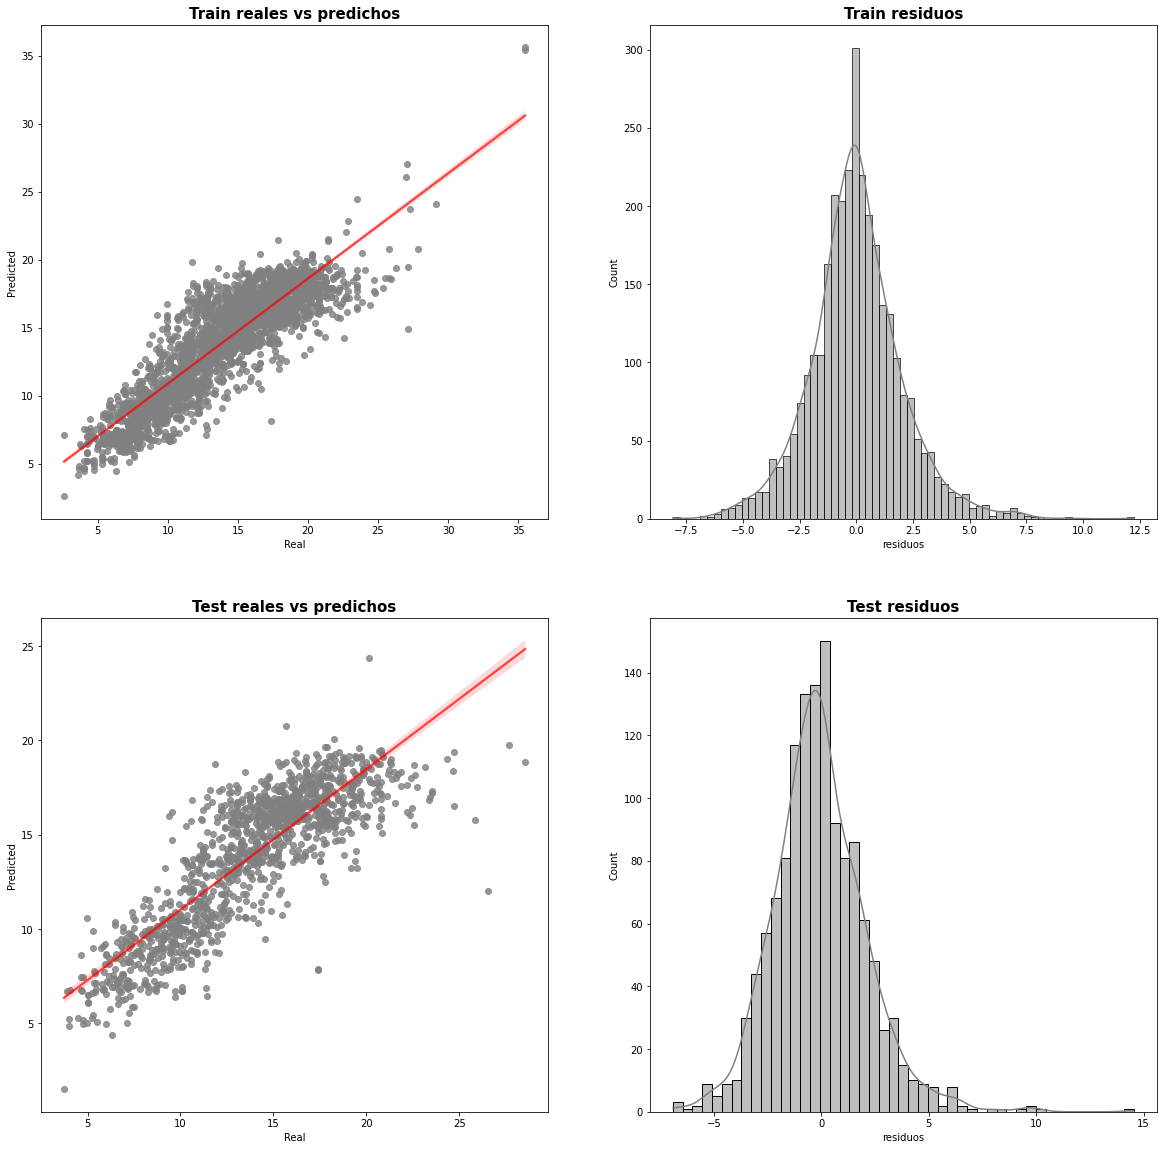

In [36]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

sns.regplot(data = resultados_dummie[resultados_dummie['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })



sns.regplot(data = resultados_dummie[resultados_dummie['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


sns.histplot(resultados_dummie[resultados_dummie['Set'] == "Train"],
             x="residuos",
             color ="grey",
            kde=True, 
             ax = ax[0,1])


sns.histplot(resultados_dummie[resultados_dummie['Set'] == "Test"],
             x="residuos",
             color = "grey",
            kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [30]:
metricas_reg_lineal = pd.concat([df_resultados_label, df_resultados_dummie], axis = 0)

In [31]:
metricas_reg_lineal

,MAE,MSE,RMSE,R2,set,modelo,type
0,2.207270,7.893886,2.809606,0.540264,test,Linear Regresion,Label 1
1,2.284685,8.472299,2.910721,0.527266,train,Linear Regression,Label 1
0,1.624632,4.736822,2.176424,0.724130,test,Linear Regresion,Dummie 1
1,1.489372,4.064977,2.016179,0.773184,train,Linear Regression,Dummie 1


In [33]:
metricas_reg_lineal.to_csv('../archivos/metricas_reg_lineal.csv')